# Set Up

In [88]:
import QuantLib as ql

today = ql.Date(7, ql.March, 2014)
ql.Settings.instance().evaluationDate = today

# The instrument

In [89]:
# a european option

option = ql.EuropeanOption(ql.PlainVanillaPayoff(ql.Option.Call, 100.0),
                           ql.EuropeanExercise(ql.Date(7, ql.June, 2014)))

# First pricing method: analytic Black-Scholes formula

In [90]:
# assumpe risk-free rate and volatility, 
#so they can be expressed by SimpleQuote instance: 
#those model numbers whose value can change and that can notify observers when this happens. 
#The underlying value is at 100, the risk-free value at 1%, and the volatility at 20%

u = ql.SimpleQuote(100.0)
r = ql.SimpleQuote(0.01)
sigma = ql.SimpleQuote(0.20)

In [91]:
# First build flat curves for the risk-free rate and the volatility

riskFreeCurve = ql.FlatForward(0, ql.TARGET(),
                               ql.QuoteHandle(r), 
                               ql.Actual360())

volatility = ql.BlackConstantVol(0, ql.TARGET(),
                                 ql.QuoteHandle(sigma), 
                                 ql.Actual360())

In [92]:
# we instantiate the process with the underlying value and the curves we just built
# The inputs are all stored into handles,
# so that we could change the quotes and curves used if we wanted.

process = ql.BlackScholesProcess(ql.QuoteHandle(u),
                                 ql.YieldTermStructureHandle(riskFreeCurve),
                                 ql.BlackVolTermStructureHandle(volatility))

# Once we have the process, we can finally use it to build the engine

engine = ql.AnalyticEuropeanEngine(process)

# Once we have the engine, we can set it to the option and evaluate the latter

option.setPricingEngine(engine)

print(option.NPV())

4.155543462156206


In [93]:
print(option.delta())
print(option.gamma())
print(option.vega())

0.5302223303784392
0.03934493301271913
20.109632428723106


# Market Change

In [94]:
# market data are stored in Quote instance and thus can notify the option when any of them changes.

u.setValue(105.0)
print(option.NPV())

7.27556357927846


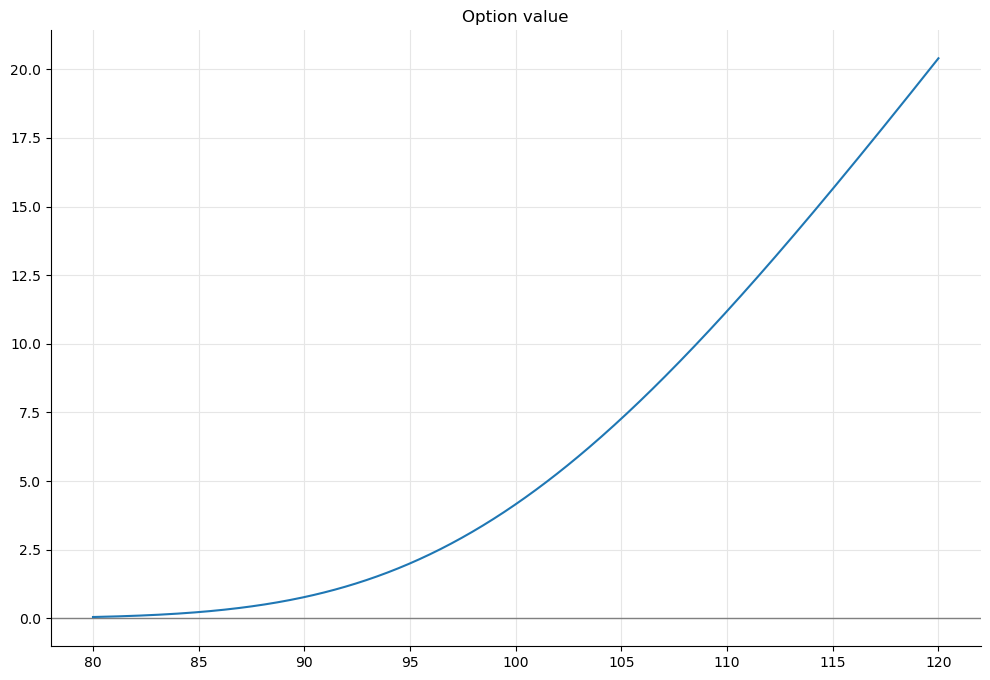

In [95]:
# use this to graph the option value depending on the underlying asset value

%matplotlib inline
import numpy as np
from IPython.display import display
import utils

# we can take an array of values from 80 to 120, set the underlying value to each of them,
# collect the corresponding option values, and plot the results

f, ax = utils.plot()
xs = np.linspace(80.0, 120.0, 400)
ys = []

for x in xs:
    u.setValue(x)
    ys.append(option.NPV())
ax.set_title("Option value")
utils.highlight_x_axis(ax)
ax.plot(xs,ys)


# Date Change

In [96]:
# the value also change if we advance the evaluation date.
# we move to a date two months before exercise. compare to the "set up" section date.


u.setValue(105.0)
r.setValue(0.01)
sigma.setValue(0.20)
print(option.NPV())

7.27556357927846


In [97]:
ql.Settings.instance().evaluationDate = ql.Date(7, ql.April, 2014)

print("After Date Changed: {0}".format(option.NPV()))

After Date Changed: 6.560073820974377


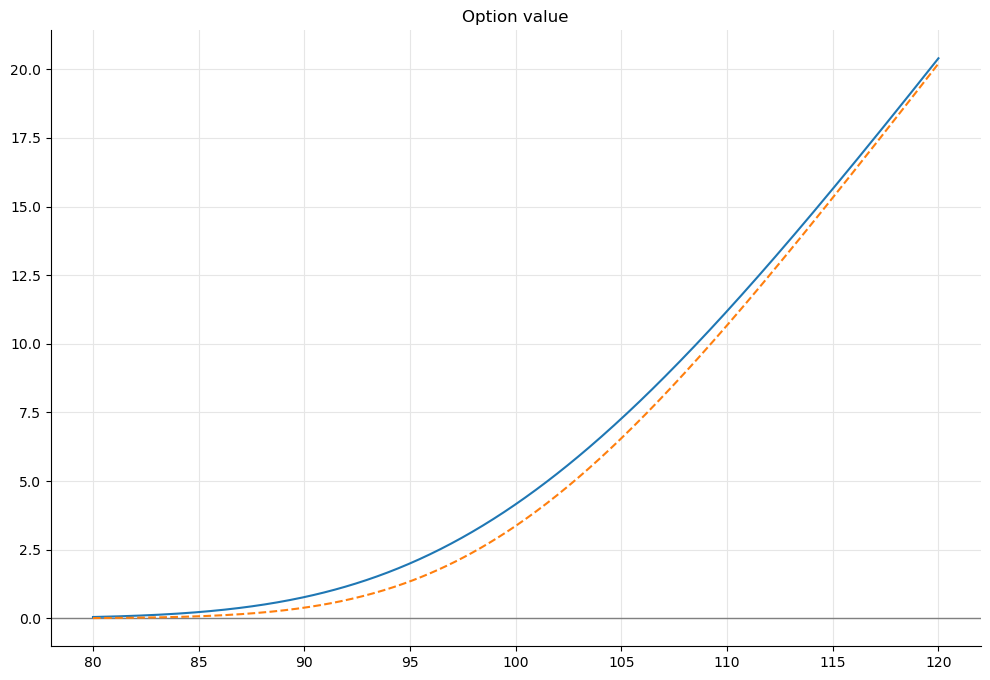

In [98]:
ys = []
for x in xs:
    u.setValue(x)
    ys.append(option.NPV())
ax.plot(xs,ys,"--")
display(f)

In [99]:
ql.Settings.instance().evaluationDate = ql.Date(7, ql.May, 2014)

print("After Date Changed: {0}".format(option.NPV()))

After Date Changed: 20.087663539260358


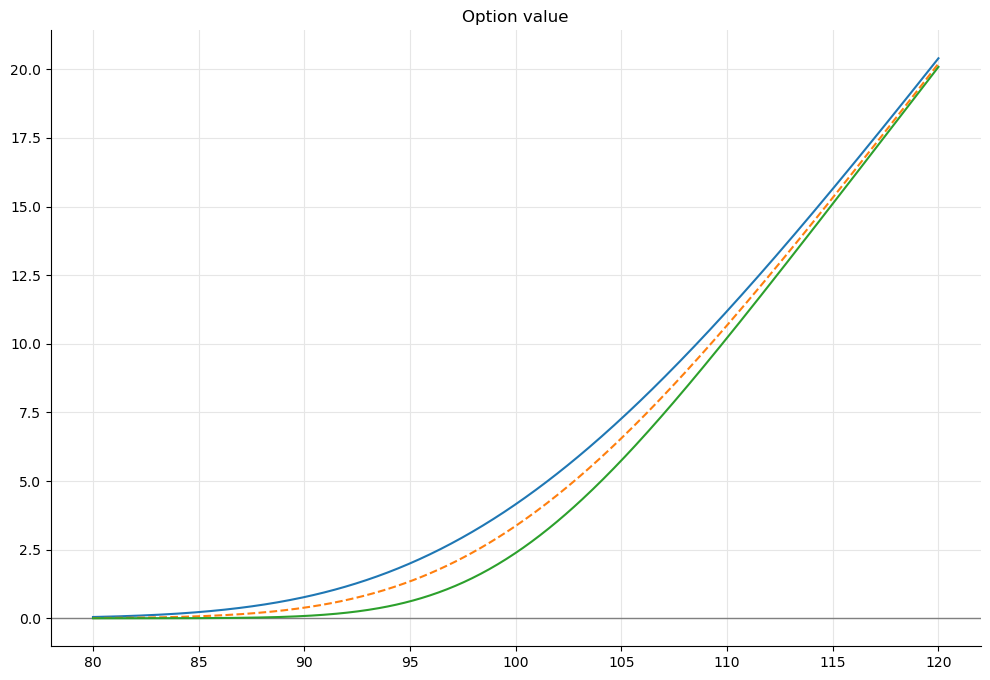

In [100]:
ys = []
for x in xs:
    u.setValue(x)
    ys.append(option.NPV())
ax.plot(xs,ys,"")
display(f)

In [102]:
ql.Settings.instance().evaluationDate = ql.Date(7, ql.June, 2014)
print(option.NPV())

0.0


# Other pricing methods